# <font color='blue'>SME0241 - Introdução à Modelagem Matemática</font>

## Lista 1 (Data de Entrega: 11/10/2022)

## Prof. Luis Gustavo Nonato
## Monitor: Bruno da Freiria Mischiati Borges  

ICMC-USP

----

## <font color='blue'> Instruções para lista 1</font>
<font color='blue'> Os seguintes passos devem ser seguidos para realizar a lista:

1. Baixe e renomeie o notebook `SME241_lista_1.ipynb` com seu nome e número USP
2. Uma vez que tenha concluído a lista, faça upload do notebook (renomeado) no diretório `Entrega Listas Exercicios/Lista 1`

Em todas as questões abaixo você precisa marcar a alternariva correta e também incluir o código Python que calcula a resposta da questão. Para marcar a alternativa que julgue correta, inclua um sinal (X) na frente da mesma. Por exemplo:

a) 123<br>
b) 234 (X)<br>
c) 345<br>
d) 456

</font>

<font color='red'> Não esqueça de renomear o arquivo com seu nome e número USP antes de fazer upload no Drive. <br><br>Por exemplo: <br><br> **Gustavo_Nonato_3223813.ipynb** <br><br> Insira também seu nome e número USP na célula abaixo.</font>

---

**Nome**:

**No USP**:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

### Questão 1:  (2,5 pontos)
Considerando a equação do calor abaixo:

$$
u_t(x,t)=\kappa u_{xx}(x,t)
$$

onde $\kappa=2$. Suponha que o intervalo temporal esteja discretizado de modo que $\Delta t = 0.14$. Qual dos valores abaixo para $\Delta x$ torna o método de diferenças finitas estável?
Implemente um código para encontrar o valor pedido

a) 0.6</font><br>
b) 0.75 (X)<br>
c) 0.70<br>
d) 0.5<br>

In [25]:
# Solucao
k = 2
delta_t = 0.14

#Para calcular para qual taxa de variacao de x temos que o metodo de diferenças finitas fique estavel usamos a formula abaixo

delta_x = (2*k*delta_t)**(1/2)
print(delta_x)

#Logo, para que o método seja estável e consistente, logo convergente, delta_X deve ser, no mínimo, 0.75

0.7483314773547883


### Questão 2:  (2,5 pontos)
Considere a função 

$$
f(x)=tan(x)
$$

no intervalo $x\in[0.2,0.6]$.

Aproxime a função no ponto x = 0.4 utilizando o polinômio de Taylor de segundo grau abaixo

$$
f(x_0+h) = f(x_0)+f^{'}(x_0)h + f^{''}(x_0)\frac{h^2}{2}
$$

Qual o valor da aproximação no ponto $x = 0.5$ (considere três casas decimais)?

Imprima, em um só quadro, o gráfico da função $f(x) = tan(x)$ e do polinômio de Taylor obtido. Além disso, mostre graficamente o ponto $x = 0.5$ avaliado no polinômio de Taylor.


a) 0.437<br>
b) 0.643<br>
c) 0.545 (X)<br>
d) 0.449<br>

In [26]:
#Solução

#Definir melhor h e, então, utilizá-lo para aproximar

#erro absoluto
def erro_abs(aproximacao, exato):
    soma = 0
    for i in range(len(aproximacao)):
        soma += abs(aproximacao[i] - exato[i])/abs(exato[i])
    return soma

<AxesSubplot:>

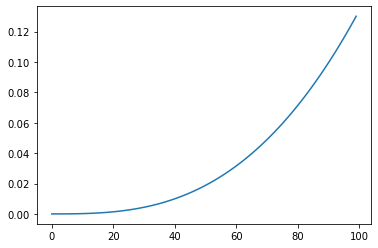

In [27]:
#Verificando melhor h para utilizar

x = np.linspace(0.2,0.6,101)
y = [math.tan(val) for val in x]
lista_h = np.linspace(0.001, 0.1, 100)
indice = 0
erro, i_erro = [], []
for h in lista_h:
    polinomio = []
    for val in x:
        val = val - h
        f = math.tan(val)
        f_linha = 1/(math.cos(val)**2)
        f_linha2 = 2 * math.tan(val)/ math.cos(val)**2

        valor_aproximado = f + f_linha*h + f_linha2*(h**2)/2
        polinomio.append(valor_aproximado)
    erro.append(erro_abs(polinomio, y))
    i_erro.append(indice)
    indice += 1
    
sns.lineplot(x = i_erro, y = erro)

#Quanto menor o h, menor o erro associado à aproximação
#Será utilizado h = 0.001 (o menor testado)

Utilizando h = 0.001


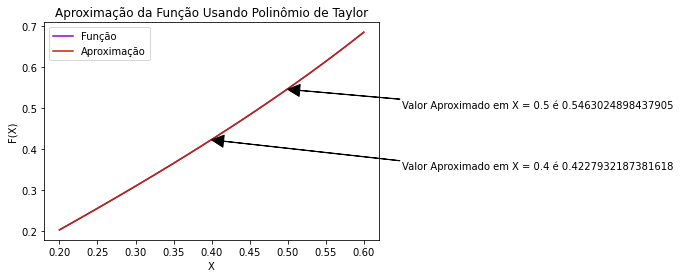

In [28]:
h = min(lista_h)
print(f'Utilizando h = {h}')

x = np.linspace(0.2,0.6,101)
y = [math.tan(val) for val in x]
polinomio = []
for val in x:
    #usando h de 0.001, então o ponto inicial deve ser x = x - h = x - 0.001
    val = val - h
    f = math.tan(val)
    f_linha = 1/(math.cos(val)**2)
    f_linha2 = 2 * math.tan(val)/ math.cos(val)**2

    valor_aproximado = f + f_linha*h + f_linha2*(h**2)/2
    polinomio.append(valor_aproximado)

df = pd.DataFrame({'y': y})
df.index = x    

fig, ax = plt.subplots()
plt.title('Aproximação da Função Usando Polinômio de Taylor')
plt.ylabel('F(X)')
plt.xlabel('X')
ax.plot(x, y, color = '#9400D3', label = 'Função')
ax.plot(x, polinomio, color = '#bb2800', label = 'Aproximação')
plt.annotate(f'Valor Aproximado em X = 0.5 é {df.loc[0.5][0]}', xy=(0.5,0.545), xytext=(0.65,0.5),arrowprops=dict(facecolor='black', width=0.2),)
plt.annotate(f'Valor Aproximado em X = 0.4 é {df.loc[0.4][0]}', xy=(0.4,0.422), xytext=(0.65,0.35),arrowprops=dict(facecolor='black', width=0.2),)
ax.legend()

#### Questão 3:  (2,5 pontos)
Considere a equação do calor como descrita abaixo:

$$
u_t(x,t)=\kappa u_{xx}(x,t)
$$

Supondo $x\in[0,2\pi]$, $t\in[0,3]$, $\kappa=3$, $\Delta x = 0.7$ e as condições de contorno $u(0,t)=t^3$ e $u(2\pi,t)=sen(t)$ encontre uma aproximação do valor da solução em $u(2,3)$. O valor aproximado é:

a) 6.984 (X)<br>
b) 6.975<br>
c) 6.447<br>
d) 6.450<br>

Faça um gráfico da solução aproximada em $u(x,3)$ e o ponto $u(2,3)$ apontado na solução.

Dica: calcule a solução aproximada em $u(x,3)$ por interplação linear

Verificando a condição de estabilidade 0.49999999999999994
Numero de divisoes em x com delta_x = 0.7: 9
Numero de divisoes em t com delta_t = 0.08166666666666665: 37


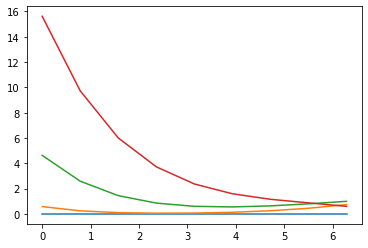

In [20]:
# Solucao

# Não houve uma aproximação que fosse próxima suficiente às aproximações, então tentei com um delta_x menor, mas também não foi 
# uma aproximação suficiente. A alternativa mais próxima ao 7 foi escolhida

# Solucao

#Testando com um delta_x menor para ter melhor aproximacao

delta_x = 0.7
delta_t = (delta_x**2)/(2*k)

#discretizando t
t = 3
n_t = int(t/delta_t)+1
#delta_t é menor do que o calculado, portanto, garante a convergencia
lista_t = np.linspace(0,t,n_t)

#discretizando x com n_x = 0.7
x = 2*math.pi
nx = int(x/delta_x)+1
lista_x = np.linspace(0, x, nx)

k = 3

print('Verificando a condição de estabilidade',k*delta_t/delta_x**2)
print(f'Numero de divisoes em x com delta_x = {delta_x}: {nx}\nNumero de divisoes em t com delta_t = {delta_t}: {n_t}')

temp = np.zeros((nx,n_t))
#temperatura na primeira extremidade
temp[0,:] = lista_t**3
#temperatura na outra extremidade
temp[-1,:] = np.sin(lista_t)

for i in range(1,n_t):
    for j in range(1,nx-1):
        temp[j,i] = temp[j,i-1] + delta_t*k*(temp[j+1,i-1] - 2*temp[j,i-1] + temp[j-1,i-1])/(delta_x**2)
    
for i in range(0,n_t,10):
    plt.plot(lista_x,temp[:,i])

0.0: 27.0
0.7853981633974483: 17.504507033836678
1.5707963267948966: 11.226518880701587
2.356194490192345: 7.146814927271859
3.141592653589793: 4.533738382813698
3.9269908169872414: 2.864058732990166
4.71238898038469: 1.7573169908905442
5.497787143782138: 0.9273072984116132
6.283185307179586: 0.1411200080598672


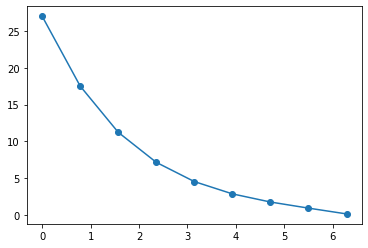

In [21]:
plt.plot(lista_x, temp[:,-1], marker = 'o')
for i in range(len(temp)):
    print(f'{lista_x[i]}: {temp[i,-1]}')

Verificando a condição de estabilidade 0.5
Numero de divisoes em x com delta_x = 0.07: 90
Numero de divisoes em t com delta_t = 0.0008166666666666668: 3674


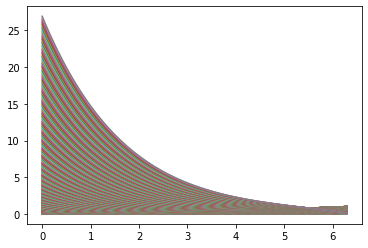

In [22]:
# Solucao

#Testando com um delta_x menor para ter melhor aproximacao

delta_x = 0.07
delta_t = (delta_x**2)/(2*k)

#discretizando t
t = 3
n_t = int(t/delta_t)+1
#delta_t é menor do que o calculado, portanto, garante a convergencia
lista_t = np.linspace(0,t,n_t)

#discretizando x com n_x = 0.7
x = 2*math.pi
nx = int(x/delta_x)+1
lista_x = np.linspace(0, x, nx)

k = 3

print('Verificando a condição de estabilidade',k*delta_t/delta_x**2)
print(f'Numero de divisoes em x com delta_x = {delta_x}: {nx}\nNumero de divisoes em t com delta_t = {delta_t}: {n_t}')

temp = np.zeros((nx,n_t))
#temperatura na primeira extremidade
temp[0,:] = lista_t**3
#temperatura na outra extremidade
temp[-1,:] = np.sin(lista_t)

for i in range(1,n_t):
    for j in range(1,nx-1):
        temp[j,i] = temp[j,i-1] + delta_t*k*(temp[j+1,i-1] - 2*temp[j,i-1] + temp[j-1,i-1])/(delta_x**2)
    
for i in range(0,n_t,10):
    plt.plot(lista_x,temp[:,i])

1.5531469298646168: 10.47298866549189
1.6237445175857357: 10.021855234528774
1.6943421053068546: 9.58963528395483
1.7649396930279737: 9.175608046488154
1.8355372807490926: 8.77907662615281
1.9061348684702115: 8.399367448460069
1.9767324561913304: 8.035829323351585
2.0473300439124493: 7.687832941299391
2.1179276316335685: 7.354769958951454
2.188525219354687: 7.03605253881274
2.2591228070758063: 6.731112457380199
2.3297203947969254: 6.439400686038781
2.400317982518044: 6.1603865215480855
2.470915570239163: 5.893557205765641


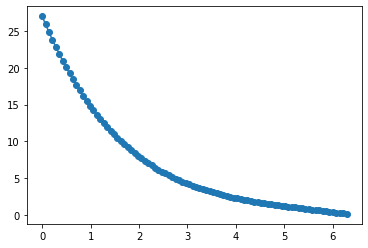

In [23]:
plt.plot(lista_x, temp[:,-1], marker = 'o')
for i in range(len(temp)):
    if abs(lista_x[i] - 2) < 0.5:
        print(f'{lista_x[i]}: {temp[i,-1]}')

#### Questão 4:  (2,5 pontos)
Considere a função $f(x)=xe^x$.
Faça o gráfico da função $f^{\prime}(x)$ (primeira derivada) e da aproximação de $\hat{f}^{\prime}(x)$ utilizando diferenças finitas centradas no intervalo $[-3,3]$ com $\Delta x=0.1$. Repita o processo para $f^{\prime\prime}(x)$ e $\hat{f}^{\prime\prime}(x)$. O valor dos erros de aproximação (com três casas decimais) $|f^{\prime}(x)-\hat{f}^{\prime}(x)|$ e $|f^{\prime\prime}(x)-\hat{f}^{\prime\prime}(x)|$ no ponto $x=1.5$ são, respectivamente:

a) 0.723 e 0.023<br>
b) 0.756 e 0.022<br>
c) 0.818 e 0.020 (X)<br>
d) 0.812 e 0.023

x                          1.500000
derivada_prim             11.204223
aprox_derivada_prim       12.023183
derivada_seg              15.685912
aprox_derivada_seg        15.706462
erro_primeira_derivada     0.818960
erro_segunda_derivada      0.020550
Name: 45, dtype: float64


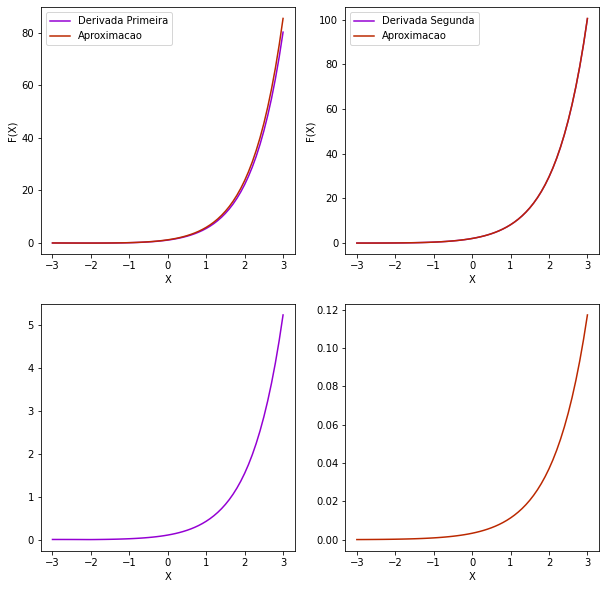

In [2]:
# Solucao

def f(x):
    return x*math.exp(x)

def f_linha(x):
    return math.exp(x)*(x+1)

def f_linha2(x):
    return math.exp(x)*(x+2)

delta_x = 0.1

n_x = int(6/delta_x)+1
lista_x = np.linspace(-3,3,n_x)

d_primeira, aprox_primeira = [],[]
d_segunda, aprox_segunda = [],[]

for x in lista_x:
    s = (f(x+delta_x) - f(x))/delta_x
    aprox_primeira.append(s)
    s2 = (f(x-delta_x) -2*f(x) + f(x+delta_x))/(delta_x**2)
    aprox_segunda.append(s2)
    
    d_primeira.append(f_linha(x))
    d_segunda.append(f_linha2(x))
    
df = pd.DataFrame({'x': lista_x, 'derivada_prim': d_primeira, 'aprox_derivada_prim': aprox_primeira,
                   'derivada_seg': d_segunda, 'aprox_derivada_seg': aprox_segunda})
df['erro_primeira_derivada'] = abs(df['derivada_prim'] - df['aprox_derivada_prim'])
df['erro_segunda_derivada'] = abs(df['derivada_seg'] - df['aprox_derivada_seg'])

print(df.iloc[45,])

fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 10))
ax[0,0].set_ylabel('F(X)')
ax[0,0].set_xlabel('X')
ax[0,0].plot(df['x'], df['derivada_prim'], color = '#9400D3',label = 'Derivada Primeira')
ax[0,0].plot(df['x'], df['aprox_derivada_prim'], color = '#bb2800', label = 'Aproximacao')
ax[0,0].legend()

ax[0,1].set_ylabel('F(X)')
ax[0,1].set_xlabel('X')
ax[0,1].plot(df['x'], df['derivada_seg'], color = '#9400D3',label = 'Derivada Segunda')
ax[0,1].plot(df['x'], df['aprox_derivada_seg'], color = '#bb2800', label = 'Aproximacao')
ax[0,1].legend()

ax[1,0].set_xlabel('X')
ax[1,0].plot(df['x'], df['erro_primeira_derivada'], color = '#9400D3', label = 'Erro de Aproximacao da Primeira Derivada')
ax[1,1].set_xlabel('X')
ax[1,1].plot(df['x'], df['erro_segunda_derivada'], color = '#bb2800',  label = 'Erro de Aproximacao da Segunda Derivada')